In [ ]:
#import modules
!pip install nltk

import pandas as pd
import io
import re
import nltk
import pickle
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize,RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics #accuracy calculation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#load data

df = pd.read_csv("datasets/reddit_train.csv", encoding = 'latin1')

FileNotFoundError: ignored

In [ ]:
df.loc[1]['BODY']

In [ ]:
#Data Processing
#Convert comments to tokens
df['BodyParsed'] = df['BODY'].str.replace("\r", " ")
df['BodyParsed'] = df['BodyParsed'].str.replace("\n", " ")
df['BodyParsed'] = df['BodyParsed'].str.replace('"', '')
df['BodyParsed'] = df['BodyParsed'].str.lower()
punctuation_signs = list("?:!.,;*()-")
df['BodyParsed'] = df['BodyParsed']
for punct_sign in punctuation_signs:
    df['BodyParsed'] = df["BodyParsed"].str.replace(punct_sign, '')
df['BodyParsed'] = df['BodyParsed'].str.replace("'s", " ")
df['BodyParsed'] = df['BodyParsed'].str.replace("    ", " ")
df.loc[1]['BodyParsed']

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['BodyParsed']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)
df['BodyParsed'] = lemmatized_text_list
df.loc[1]['BodyParsed']

In [ ]:
stop_words = stopwords.words("english")
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['BodyParsed'] = df['BodyParsed'].str.replace(regex_stopword,'')
df.loc[1]['BodyParsed']

In [ ]:
#Train - test split
X_train, X_test, y_train, y_test = train_test_split(df['BodyParsed'],
                                                   df['REMOVED'],
                                                   test_size = 0.30,
                                                   random_state = 8)

In [ ]:
#Using TF-IDF (Term frequency - inverse document frequency) as features

#Parameter election
ngram_range = (1,2) #Consider both unigram and bigrams
min_df = 10 #Ignore terms that have a document frequency strictly lower than the given threshold
max_df = 1.0 #Ignore terms that have a document frequency strictly higher than this threshold. (1.0 means entire document)
max_features = 300  #If not None, build a vocabulary that only consider the top max_features ordered by term frequency

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

In [ ]:
#Saving files
# X_train
with open('Pickles/X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('Pickles/X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('Pickles/y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('Pickles/y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open('Pickles/df.pickle', 'wb') as output:
    pickle.dump(df, output)
    
# features_train
with open('Pickles/features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open('Pickles/labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open('Pickles/features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open('Pickles/labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open('Pickles/tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)

In [ ]:
#Loading Data

# Dataframe
path_df = "Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
removed_codes = {
    'removed' : 1,
    'not removed' : 0
}
for Product, category_id in sorted(removed_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-20:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'not removed' category:
  . Most correlated unigrams:
. result
. research
. effect
. kid
. compare
. likely
. study
. interest
. paper
. publish
. journal
. use
. article
. link
. abstract
. question
. edit
. comment
. https
. http
  . Most correlated bigrams:
. 

# 'removed' category:
  . Most correlated unigrams:
. result
. research
. effect
. kid
. compare
. likely
. study
. interest
. paper
. publish
. journal
. use
. article
. link
. abstract
. question
. edit
. comment
. https
. http
  . Most correlated bigrams:
. 



In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 

In [ ]:
# train the model on train set 
model = SVC() 
model.fit(features_train, labels_train) 
  
# print prediction results 
predictions = model.predict(features_test) 
print(classification_report(labels_test, predictions)) 

              precision    recall  f1-score   support

           0       0.73      0.90      0.80      4335
           1       0.58      0.30      0.39      2066

    accuracy                           0.70      6401
   macro avg       0.65      0.60      0.60      6401
weighted avg       0.68      0.70      0.67      6401



In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(features_train, labels_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.683, total=  58.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.681, total=  57.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.682, total=  57.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.685, total= 1.0min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.682, total= 1.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.679, total=  53.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.679, total=  55.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.679, total=  52.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.679, total=  53.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.684, total=  55.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.681, total=  55.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.687, total=  53.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.689, total=  55.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.687, total=  55.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.679, total=  53.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.679, total=  53.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.692, total=  50.6s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.690, total=  50.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.685, total=  47.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.681, total=  48.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.687, total=  47.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.690, total=  47.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.687, total=  47.7s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 209.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
grid_predictions = grid.predict(features_test) 
  
# print classification report 
print(classification_report(labels_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.73      0.90      0.80      4335
           1       0.58      0.29      0.39      2066

    accuracy                           0.70      6401
   macro avg       0.65      0.60      0.60      6401
weighted avg       0.68      0.70      0.67      6401



In [ ]:
matrix = plot_confusion_matrix(grid, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [ ]:
grid.cv_results_

{'mean_fit_time': array([ 49.47567735,  44.36216741,  41.15453749,  39.86371279,
         39.49637299,  54.93895898,  45.5427299 ,  48.57944565,
         46.87563562,  44.30261383, 260.52063279,  50.99082417,
         45.67880845,  45.02585974,  43.70011048, 227.99527421,
        156.60417399,  45.7913137 ,  42.52617922,  40.84516163,
        214.90388803, 462.35679259, 107.06384993,  42.94058223,
         39.76389656]),
 'std_fit_time': array([ 1.8694031 ,  0.91855044,  1.44298844,  1.08135768,  1.12283896,
         1.86216033,  1.78136005,  0.44031944,  1.02022447,  0.73271166,
         6.23193258,  2.45104908,  0.72671927,  0.77089718,  1.54262371,
        12.85628035,  4.81035918,  0.2265034 ,  0.29835016,  0.34196039,
         8.84485888, 20.37023901,  1.30211608,  0.28834622,  0.12388245]),
 'mean_score_time': array([10.04120164,  9.33690457,  8.58957529,  8.77093434,  8.47093291,
        11.11604686,  9.80113707, 10.18387442,  9.80963545,  9.65134048,
        12.81654501,  9.617

In [ ]:
resultsDF = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
resultsDF.groupby(by = ["C"])
resultsDF

,C,gamma,kernel,Accuracy
0,0.1,1.0000,rbf,0.682424
1,0.1,0.1000,rbf,0.679210
2,0.1,0.0100,rbf,0.679210
3,0.1,0.0010,rbf,0.679210
4,0.1,0.0001,rbf,0.679210
5,1.0,1.0000,rbf,0.698560
6,1.0,0.1000,rbf,0.685303
7,1.0,0.0100,rbf,0.679210
8,1.0,0.0010,rbf,0.679210
9,1.0,0.0001,rbf,0.679210


<Figure size 432x288 with 0 Axes>

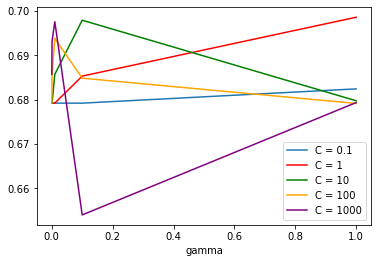

<Figure size 432x288 with 0 Axes>

In [ ]:
ax = plt.gca()
resultsDF1 = resultsDF[(resultsDF.C == 0.1)]
resultsDF1.plot(kind='line', x = 'gamma', y = 'Accuracy', ax = ax, label = "C = 0.1")
resultsDF2 = resultsDF[(resultsDF.C == 1)]
resultsDF2.plot(kind='line', x = 'gamma', y = 'Accuracy', color = "red", ax = ax, label = "C = 1")
resultsDF2 = resultsDF[(resultsDF.C == 10)]
resultsDF2.plot(kind='line', x = 'gamma', y = 'Accuracy', color = "green", ax = ax, label = "C = 10")
resultsDF3 = resultsDF[(resultsDF.C == 100)]
resultsDF3.plot(kind='line', x = 'gamma', y = 'Accuracy', color = "orange", ax = ax, label = "C = 100")
resultsDF4 = resultsDF[(resultsDF.C == 1000)]
resultsDF4.plot(kind='line', x = 'gamma', y = 'Accuracy', color = "purple", ax = ax, label = "C = 1000")
plt.figure()


In [ ]:
labels_test = np.asarray(labels_test)
misclassified = np.where(labels_test != grid.predict(features_test))

In [ ]:
misclassified_samples = X_test[labels_test != grid_predictions]
pd.DataFrame(misclassifi)

15679    baltimore city spend  per pupil  almost   publ...
13639     title   happen   college student look   thesa...
1915            whats next  sort  halfman halfbear halfpig
4722                                 get legs  know   use 
9419                                well might  well face 
                               ...                        
9070       fair    time    ' believe  god christians wo...
14802    '  british person    qualify   doctor  would n...
7938                     thing wrong  cannabis     illegal
14127                                          vague title
14414      country australia   illegal    whistleblower...
Name: BodyParsed, Length: 1903, dtype: object
